In [175]:
from scipy import optimize
from uncertainties import ufloat
import numpy as np
import matplotlib.pyplot as plt
from uncertainties.unumpy import cos

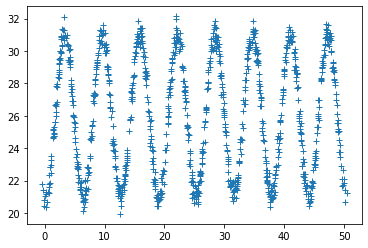

In [201]:
x = np.linspace(0, 50, 1000)
x += np.random.normal(size=len(x), scale=0.4)
f = lambda x, E, a, b: a*np.cos(x + b) + E 

a = ufloat(5, 0.2)
b = ufloat(3, 0.1)
y = f(x, 26, a.nominal_value, b.nominal_value) + np.random.normal(size=len(x), scale=0.4)


plt.plot(x, y, '+')

In [202]:
pval, pcov = optimize.curve_fit(lambda x, E: f(x, E, 5, 3), x, y, sigma=1*np.ones_like(x), absolute_sigma=True)
E_nom = pval.squeeze()

In [203]:
u_E = np.sqrt(pcov.squeeze())

In [204]:
E = ufloat(E_nom, u_E)

In [205]:
print(E)

25.994+/-0.032


In [206]:
from scipy import odr

In [207]:
data = odr.RealData(x, y, 0.4, 0.4)
g = lambda beta, x: f(x, beta[0], beta[1], beta[2])
model = odr.Model(g)

In [208]:
solver = odr.ODR(data, model,
                 beta0=[E.nominal_value, a.nominal_value, b.nominal_value],ifixb=[1, 0, 0])

In [209]:
o = solver.run()

In [210]:
o.pprint()

Beta: [26.01181066  5.          3.        ]
Beta Std Error: [0.01319895 0.         0.        ]
Beta Covariance: [[0.00082933 0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
Residual Variance: 0.2100628300190139
Inverse Condition #: 1.0000000000000002
Reason(s) for Halting:
  Iteration limit reached


In [211]:
print(o.sd_beta)

[0.01319895 0.         0.        ]


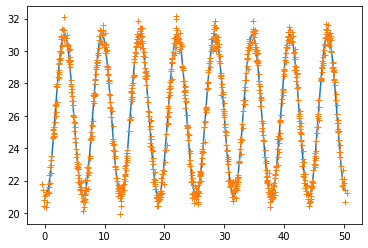

In [212]:
E_fit, a_fit, b_fit = o.beta
xi = np.linspace(0, 50, 1000)
plt.plot(xi, f(xi, E_fit, a_fit, b_fit))
plt.plot(x, y, '+')

In [215]:
u1_E = o.sd_beta[0]
f2 = lambda x, E, a, b: a*cos(x + b) + E 

f_E = lambda x, y, a, b: -(a*cos(x + b) - y)
x_fit = ufloat(3, 0.4)
y_fit = f2(x_fit, E_fit, a_fit, b_fit)
E_u = f_E(x_fit, y_fit, a, b)
u2_E = E_u.std_dev


u_E = np.linalg.norm([u1_E, u2_E])
print(ufloat(E_fit, u_E))

26.01+/-0.24
